In [3]:
import pandas as pd 

all_uris = set(pd.read_csv('../data/entities.csv').uri)
print(all_uris)

{'http://www.wikidata.org/entity/Q190643', 'http://www.wikidata.org/entity/Q1130310', 'http://www.wikidata.org/entity/Q862263', 'http://www.wikidata.org/entity/Q315099', 'http://www.wikidata.org/entity/Q240869', 'http://www.wikidata.org/entity/Q457457', 'http://www.wikidata.org/entity/Q4979079', 'http://www.wikidata.org/entity/Q3335599', 'http://www.wikidata.org/entity/Q353031', 'http://www.wikidata.org/entity/Q13479530', 'http://www.wikidata.org/entity/Q837945', 'http://www.wikidata.org/entity/Q206922', 'http://www.wikidata.org/entity/Q2093067', 'http://www.wikidata.org/entity/Q752362', 'http://www.wikidata.org/entity/Q3011161', 'http://www.wikidata.org/entity/Q1999640', 'http://www.wikidata.org/entity/Q361587', 'http://www.wikidata.org/entity/Q3048083', 'http://www.wikidata.org/entity/Q1357', 'http://www.wikidata.org/entity/Q766325', 'http://www.wikidata.org/entity/Q939351', 'http://www.wikidata.org/entity/Q232797', 'http://www.wikidata.org/entity/Q16333828', 'http://www.wikidata.org

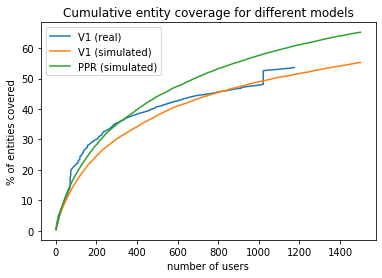

In [8]:
import matplotlib.pyplot as plt

def get_coverage(ratings):
    ratios = []
    user_counts = []
    seen_uris = set()
    
    for idx, user in enumerate(set(ratings.userId)):
        seen_uris.update(set(ratings[ratings.userId == user].uri))
        
        user_counts.append(idx + 1)
        ratios.append(len(seen_uris) / len(all_uris) * 100)

    return user_counts, ratios

ratings_file = {
    'V1 (real)': '../data/mr-100k.csv',
    'V1 (simulated)': '../data/mr-simulated-v1.csv',
    'PPR (simulated)': '../data/mr-simulated-ppr.csv',
}

for name, file in ratings_file.items():
    plt.plot(*get_coverage(pd.read_csv(file)), label=name)

plt.xlabel('number of users')
plt.ylabel('% of entities covered')
plt.title('Cumulative entity coverage for different models')
plt.legend()
plt.savefig('../figures/cumulative_coverage.pdf', bbox_inches='tight')
plt.show()
